In [2]:
!pip install pyproj

In [3]:
!pip install geopandas

In [4]:
!pip uninstall cython -y
!pip install cython
!pip uninstall cartopy -y
!pip install cartopy

Found existing installation: Cython 3.0.2
Uninstalling Cython-3.0.2:
  Successfully uninstalled Cython-3.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 20.2 MB/s eta 0:00:00


In [5]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely
!pip install shapely --no-binary shapely

E: Unable to locate package python-cartopy
Found existing installation: shapely 2.0.1
Uninstalling shapely-2.0.1:
  Successfully uninstalled shapely-2.0.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.5/275.5 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shapely: filename=shapely-2.0.1-cp310-cp310-linux_x86_64.whl size=890029 sha256=daee1c1e1e6d18de2e889d23c274c53e1aaebec5bb259804146287c4b1fc0a22
  Stored in directory: /root/.cache/pip/wheels/07/bd/06/4e979fa263bca266484ee65f5aab8e6b1c9b20f8caa6f2d7da
Successfully built shapely


In [6]:
import pandas as pd
import pyproj
import math
import matplotlib.pyplot as plt
import seaborn as sb
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade
import geopandas as gpd
import random
from shapely.geometry import Point, Polygon
import time

In [7]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [8]:
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [9]:
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,710198.574916,780930.648555


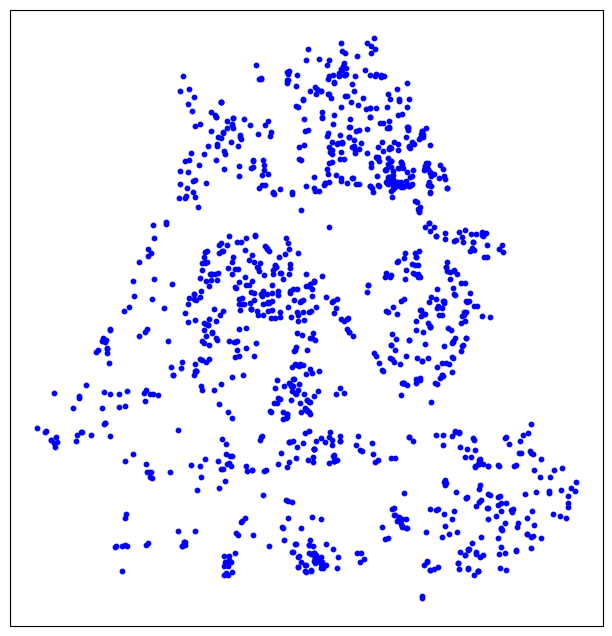

In [10]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)
plt.show()

In [11]:
url = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/'

file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.shp", "68276_urbano.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

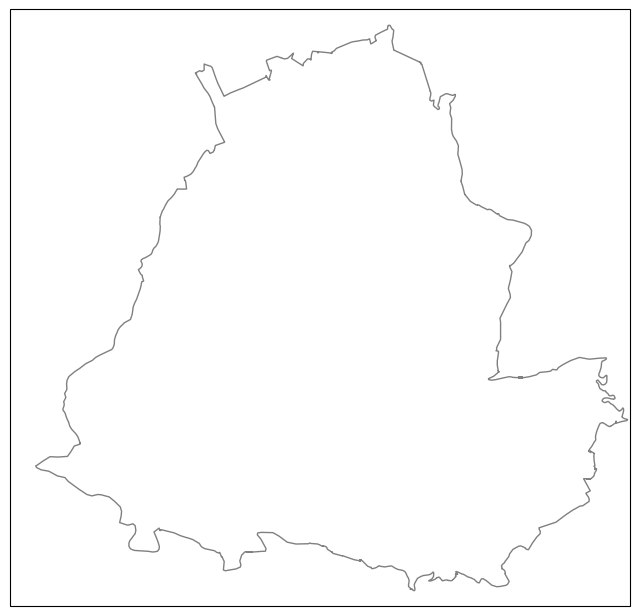

In [12]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Puntos De Floridablanca
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

plt.show()

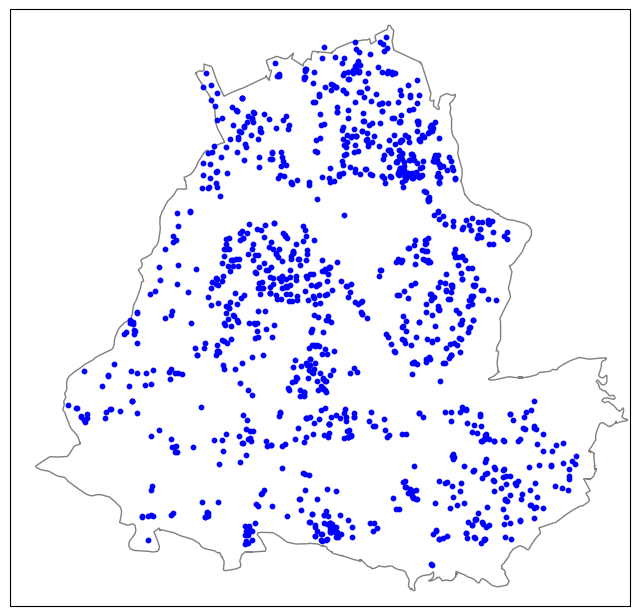

In [13]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Puntos De Floridablanca
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)

plt.show()

In [14]:
import geopandas as gpd
poli = gpd.read_file('68276_urbano.shp')
poli

,EXTRUDE,COUNT,geometry
0,0,215,"POLYGON ((-73.11295 7.06176, -73.11340 7.06220..."


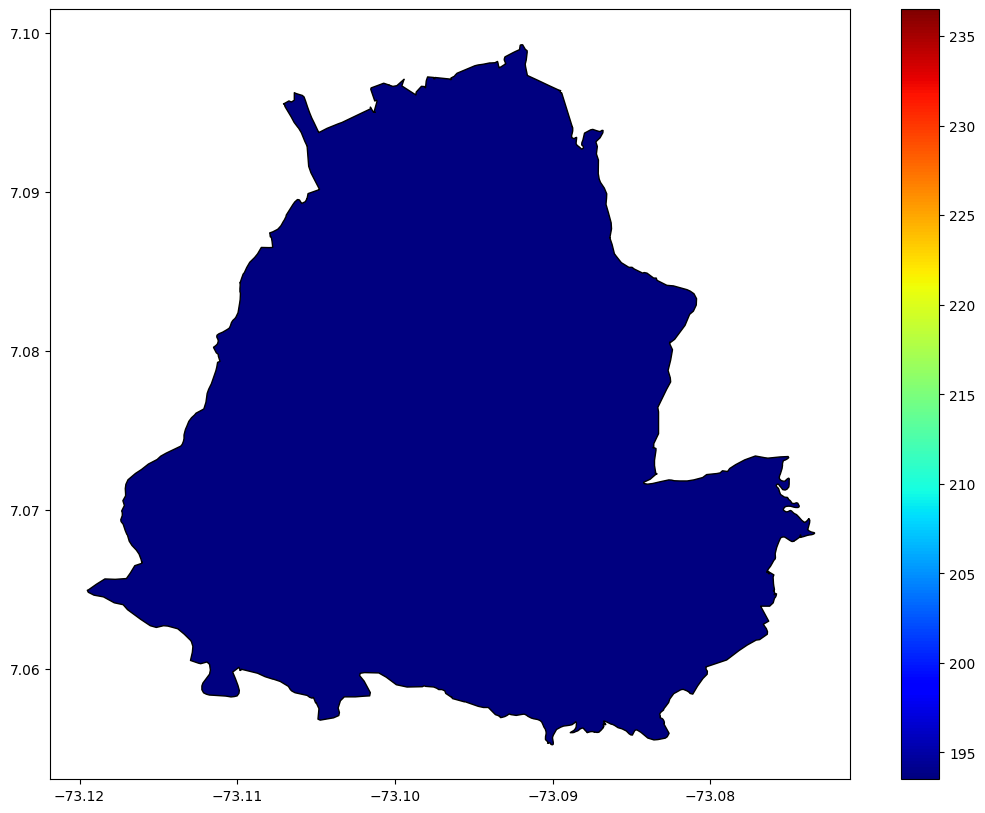

In [15]:
fig, ax = plt.subplots(1, figsize = (13,10))
poli.plot(ax=ax, column= 'COUNT', edgecolor ='black', cmap='jet', legend = True)
plt.show()

In [16]:
poli.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
poli = poli.to_crs({'init':'epsg:32618'})

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [20]:
poli.crs
poli

,EXTRUDE,COUNT,geometry
0,0,215,"POLYGON ((708435.587 780998.731, 708386.357 78..."


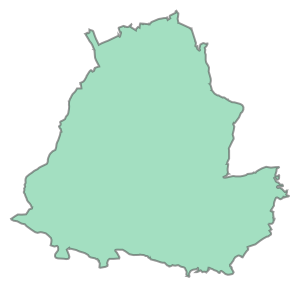

In [21]:
poli.loc[0,'geometry']

In [24]:
from shapely.geometry import shape
area= shape(poli.loc[0,'geometry']).area
print(area)

14180920.862356503


In [23]:
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,710198.574916,780930.648555


In [27]:
listPunt = []
for i in range(len(df)):
  listPunt.append((df.loc[i, "x"], df.loc[i, "y"]))

Función Distancia

In [28]:
#Función Distancia
def calc_distancia(p1,p2):
  return((p2[0]-p1[0])**2+(p2[1]-p1[1])**2)**0.5

In [29]:
#Función Sumatoria
def sumatoria(listPunt,distamax):
  n = 0
  for i in range(len(listPunt)):
    for j in range(i+1, len(listPunt)):
      if calc_distancia(listPunt[i], listPunt[j]) <= distamax:
        n+=1
  return n;

sum = sumatoria(listPunt,100)
n = len(listPunt)
k = area*sum/n**2

print("Área: ", area)
print("Sumatoria: ", sum)
print("Número de puntos: ", n)
print("Función K: ", k)

Área:  14180920.862356503
Sumatoria:  3978
Número de puntos:  1262
Función K:  35420.158673535436


In [33]:
#Funcion K Ripley
def k_ripley(listPunt, distancia, area):
  sum = sumatoria(listPunt,100)
  n = len(listPunt)
  k = area*sum/n**2

  print("Área: ", area)
  print("Sumatoria: ", sum)
  print("Número de puntos: ", n)
  print("Función K: ", k)

In [34]:
def Random_Points_in_Bounds(polygon, number):
    minx, miny, maxx, maxy = polygon.bounds
    x = np.random.uniform( minx, maxx, number )
    y = np.random.uniform( miny, maxy, number )
    return x, y

In [35]:
import numpy as np
from shapely.geometry import Point, Polygon

In [37]:
gdf2_poly = gpd.GeoDataFrame(index=["floridablanca"], geometry=[poli.loc[0,'geometry']])

x,y = Random_Points_in_Bounds(poli.loc[0,'geometry'], 5)
df2= pd.DataFrame()
df2['points'] = list(zip(x,y))
df2['points'] = df2['points'].apply(Point)
gdf2_points = gpd.GeoDataFrame(df2, geometry='points')
df2['x'] = list(x)
df2['y'] = list(y)

df2

,points,x,y
0,POINT (710890.4441828987 780367.0166865868),710890.444183,780367.016687
1,POINT (711489.137083351 784601.5360675732),711489.137083,784601.536068
2,POINT (709150.4220169012 783636.687407339),709150.422017,783636.687407
3,POINT (710909.9400978698 783085.8460064706),710909.940098,783085.846006
4,POINT (709674.410917244 782123.7062510623),709674.410917,782123.706251


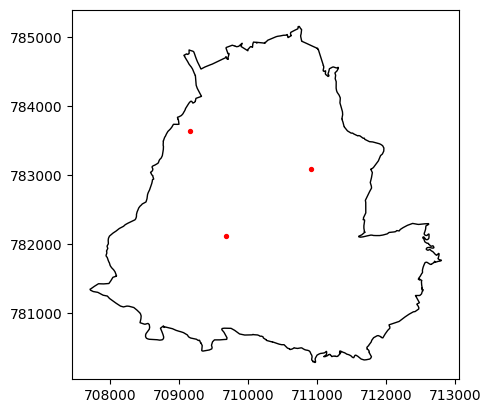

In [38]:
Sjoin = gpd.tools.sjoin(gdf2_points, gdf2_poly, predicate="within", how='left')

pnts_in_poly = gdf2_points[Sjoin.index_right=='floridablanca']

import matplotlib.pyplot as plt
base = gdf2_poly.boundary.plot(linewidth=1, edgecolor="black")
pnts_in_poly.plot(ax=base, linewidth=1, color="red", markersize=8)
plt.show()

In [50]:
import shapely

n_puntos = 1262
list_punt = []

for i in range(n_puntos):
  while True:

        #Generar un punto aleatorio en las coordenadas X y Y
        punto_x = np.random.uniform(poli.bounds.minx, poli.bounds.maxx)
        punto_y = np.random.uniform(poli.bounds.miny, poli.bounds.maxy)
        punto = shapely.geometry.Point(punto_x[0], punto_y[0])

        # Verificación del punto dentro del poligono
        punto_shapely = shapely.geometry.Point(punto_x, punto_y)
        if poli.geometry.contains(punto_shapely).any():
            list_punt.append(punto)
            break
Rpuntos_df = gpd.GeoDataFrame(geometry=list_punt, crs=poli.crs)

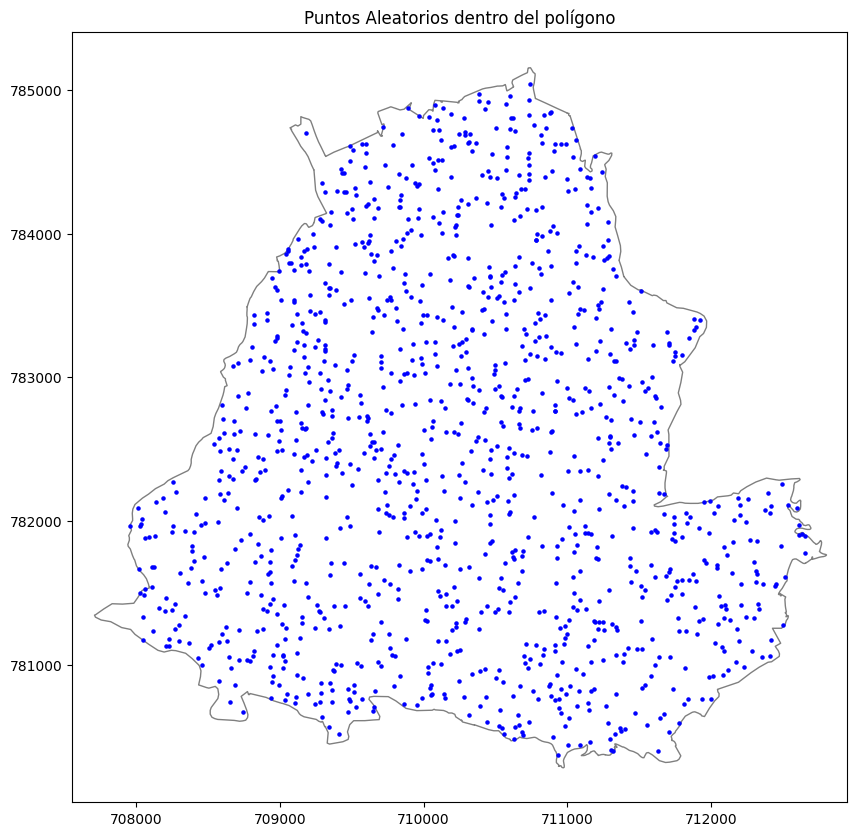

In [51]:
fig, ax = plt.subplots(figsize=(10, 10))
poli.plot(ax=ax, color="white", alpha=0.5, edgecolor='k')

# Graficar los puntos aleatorios dentro del polígono
Rpuntos_df.plot(ax=ax, color='blue', markersize=5)

# Configurar el aspecto del gráfico
plt.title('Puntos Aleatorios dentro del polígono')
plt.axis('equal')
plt.show()

In [52]:
Rpuntos_df

,geometry
0,POINT (708020.023 781669.086)
1,POINT (711133.415 783853.106)
2,POINT (710736.788 784414.588)
3,POINT (712146.883 781641.408)
4,POINT (710363.668 784632.596)
...,...
1257,POINT (709720.590 784742.372)
1258,POINT (711200.111 781743.625)
1259,POINT (711048.230 783353.373)
1260,POINT (712186.669 782162.856)


In [53]:
Rpuntos_df['X'] = Rpuntos_df.geometry.x
Rpuntos_df['Y'] = Rpuntos_df.geometry.y

In [72]:
#Convertir puntos y almacenar en lista
listPunt_R = []
for i in range(len(Rpuntos_df)):
  listPunt_R.append((Rpuntos_df.loc[i, "X"], Rpuntos_df.loc[i, "Y"]))

In [73]:
k_ripley(listPunt_R, 100, area)

Área:  14180920.862356503
Sumatoria:  1666
Número de puntos:  1262
Función K:  14834.083547036207


In [62]:
def gen_punt(n_puntos, poli):

  list_punt = []
  for i in range(n_puntos):
    while True:
          # Generar un punto aleatorio en las coordenadas X y Y
          punto_x = np.random.uniform(poli.bounds.minx, poli.bounds.maxx)
          punto_y = np.random.uniform(poli.bounds.miny, poli.bounds.maxy)
          punto = shapely.geometry.Point(punto_x[0], punto_y[0])

          # Verificar si el punto está dentro del polígono
          punto_shapely = shapely.geometry.Point(punto_x, punto_y)
          if poli.geometry.contains(punto_shapely).any():
              list_punt.append(punto)
              break

  Rpuntos_df = gpd.GeoDataFrame(geometry=list_punt, crs=poli.crs)
  Rpuntos_df['X'] = Rpuntos_df.geometry.x
  Rpuntos_df['Y'] = Rpuntos_df.geometry.y
  return (Rpuntos_df)

  num_puntos = 1262

In [77]:
df_1 = gen_punt(num_puntos, poli)
df_1.drop(columns= ["geometry"], inplace=True)
df_1

,X,Y
0,710004.901944,782702.583783
1,711677.905306,781843.749706
2,709103.209402,783665.243897
3,711501.807659,783578.257788
4,712191.512323,781303.595290
...,...,...
1257,709837.152351,782582.748728
1258,708152.068805,781308.840283
1259,711039.991080,784630.515667
1260,710662.392183,784853.629161


In [64]:
df_2 = gen_punt(num_puntos, poli)
df_2.drop(columns= ["geometry"], inplace=True)
df_2

,X,Y
0,708234.466984,782261.134311
1,711396.147372,782632.324803
2,710391.368167,782283.360853
3,711747.814692,781457.611224
4,710309.128476,784226.439708
...,...,...
1257,710834.968412,781997.644495
1258,709556.794498,782738.644746
1259,709123.270343,783332.657859
1260,710630.240518,780636.307197


In [65]:
df_3 = gen_punt(num_puntos, poli)
df_3.drop(columns= ["geometry"], inplace=True)
df_3

,X,Y
0,708502.259506,781827.592250
1,711828.609952,781473.117546
2,710530.974860,783509.287979
3,710324.872484,782697.482655
4,708118.743587,781482.850330
...,...,...
1257,710912.602309,782849.711424
1258,711513.595520,780532.749819
1259,710334.427053,782100.929534
1260,712040.254538,781450.002402


In [66]:
df_4 = gen_punt(num_puntos, poli)
df_4.drop(columns= ["geometry"], inplace=True)
df_4

,X,Y
0,708059.945311,781454.115051
1,708687.504585,781574.369124
2,711131.302653,784083.860571
3,709428.564596,780956.737242
4,710517.915674,781948.428978
...,...,...
1257,709163.609612,782137.307661
1258,710243.452828,782949.138354
1259,710114.775032,782790.029756
1260,710607.405504,784717.643261


In [67]:
df_5 = gen_punt(num_puntos, poli)
df_5.drop(columns= ["geometry"], inplace=True)
df_5

,X,Y
0,710682.169279,784078.730799
1,709567.241243,781866.271094
2,711244.919712,782248.513359
3,711891.732090,783281.946141
4,708458.087980,781525.704737
...,...,...
1257,709942.213646,782888.846079
1258,710459.379692,782658.765268
1259,710793.272712,783623.334317
1260,709397.866868,783859.344308


In [68]:
df_6 = gen_punt(num_puntos, poli)
df_6.drop(columns= ["geometry"], inplace=True)
df_6

,X,Y
0,710731.518215,784706.710937
1,711928.359374,781290.917245
2,710051.005504,783816.385362
3,711120.203053,781684.532856
4,710620.221079,781228.204879
...,...,...
1257,711696.069264,781603.589894
1258,709585.429459,783805.840126
1259,710018.333280,780829.332745
1260,710595.870784,781727.434246


In [69]:
df_7 = gen_punt(num_puntos, poli)
df_7.drop(columns= ["geometry"], inplace=True)
df_7

,X,Y
0,710373.662016,782123.173577
1,712439.236106,781099.781894
2,710820.867328,783613.688915
3,708487.139368,782310.055667
4,710255.229265,782136.196342
...,...,...
1257,708926.476630,780903.539853
1258,708253.052514,782120.619649
1259,710595.336836,782471.548554
1260,710299.956386,784213.692242


In [70]:
df_8 = gen_punt(num_puntos, poli)
df_8.drop(columns= ["geometry"], inplace=True)
df_8

,X,Y
0,708405.087231,781404.879237
1,712347.128523,781236.285605
2,709574.259090,782418.521596
3,711105.567519,780994.708729
4,710082.333928,784721.041333
...,...,...
1257,709841.169148,782571.657626
1258,710360.674386,780685.805944
1259,712230.978080,781190.458659
1260,708977.590244,782142.740721


In [71]:
df_9 = gen_punt(num_puntos, poli)
df_9.drop(columns= ["geometry"], inplace=True)
df_9

,X,Y
0,708112.208034,781219.674002
1,711424.475764,782383.082702
2,709697.137416,781288.745003
3,709114.731458,782356.480893
4,710933.090928,784174.422933
...,...,...
1257,709740.266505,781379.950660
1258,711234.582946,780409.771667
1259,711029.176041,784604.003419
1260,708750.189610,782780.434814


In [74]:
df_0 = pd.DataFrame(columns=['X', 'Y'])
df_0['X'] = df.x
df_0['Y'] = df.y
df_0

,X,Y
0,709584.027559,782579.281866
1,709262.121378,782963.354103
2,710847.924654,784163.825097
3,710863.366771,781635.895608
4,709314.159319,781570.969374
...,...,...
1257,709918.546763,782204.438977
1258,709466.644754,781388.734012
1259,709492.782783,784279.996264
1260,710198.574916,780930.648555


In [75]:
#Hallar el K Ripley de lo ya creado

def listPunt(dataframe):

  listPunt_R = []
  for i in range(len(dataframe)):
    listPunt_R.append((dataframe.loc[i, "X"], dataframe.loc[i, "Y"]))
  return listPunt_R

In [78]:
k_ripley(listPunt(df_1), 100, area)

Área:  14180920.862356503
Sumatoria:  1736
Número de puntos:  1262
Función K:  15457.36436834025


In [80]:
for i in range(0, 10):
    name_df = f'df_{i}'
    df_pri = globals()[name_df]
    print("DataFrame",i)
    listPunt_R = listPunt(df_pri)
    k_ripley(listPunt_R, 100, area)

DataFrame 0
Área:  14180920.862356503
Sumatoria:  3978
Número de puntos:  1262
Función K:  35420.158673535436
DataFrame 1
Área:  14180920.862356503
Sumatoria:  1736
Número de puntos:  1262
Función K:  15457.36436834025
DataFrame 2
Área:  14180920.862356503
Sumatoria:  1788
Número de puntos:  1262
Función K:  15920.372978451824
DataFrame 3
Área:  14180920.862356503
Sumatoria:  1657
Número de puntos:  1262
Función K:  14753.947441439974
DataFrame 4
Área:  14180920.862356503
Sumatoria:  1703
Número de puntos:  1262
Función K:  15163.53198115406
DataFrame 5
Área:  14180920.862356503
Sumatoria:  1647
Número de puntos:  1262
Función K:  14664.907324110824
DataFrame 6
Área:  14180920.862356503
Sumatoria:  1767
Número de puntos:  1262
Función K:  15733.38873206061
DataFrame 7
Área:  14180920.862356503
Sumatoria:  1668
Número de puntos:  1262
Función K:  14851.891570502035
DataFrame 8
Área:  14180920.862356503
Sumatoria:  1666
Número de puntos:  1262
Función K:  14834.083547036207
DataFrame 9
Á

In [81]:
dfs = {
    'df_OG': df_0,
    'df_1': df_1,
    'df_2': df_2,
    'df_3': df_3,
    'df_4': df_4,
    'df_5': df_5,
    'df_6': df_6,
    'df_7': df_7,
    'df_8': df_8,
    'df_9': df_9
}

In [82]:
#Modificacion funcion K Ripley

def distancia(x1,y1,x2,y2):
  return math.sqrt((x2-x1)**2 + (y2-y1)**2)

def k_ripley2 (df, metros, area):
  points = [[x, y] for x, y in zip(df['X'], df['Y'])]
  contador = 0

  for i in range(len(points)):
      x1, y1 = points[i]
      for j in range(i + 1, len(points)):
          x2, y2 = points[j]
          dist = distancia(x1, y1, x2, y2)
          if dist <= metros:
            contador += 1
  k = (area/len(points)**2)*contador

  return k

In [87]:
result = {'grupo': [],
              'distancia_20': [],
              'distancia_40': [],
              'distancia_60': [],
              'distancia_80': [],
              'distancia_100': [],
              'distancia_120': [],
              'distancia_140': [],
              'distancia_160': [],
              'distancia_180': [],
              'distancia_200': []}

for nombre_df, dataframe in dfs.items():
    result['grupo'].append(nombre_df)
    for metros in range(20, 201, 20):
        resultado = k_ripley2(dataframe, metros, area)
        result[f'distancia_{metros}'].append(resultado)

df_result = pd.DataFrame(result)
df_result

,grupo,distancia_20,distancia_40,distancia_60,distancia_80,distancia_100,distancia_120,distancia_140,distancia_160,distancia_180,distancia_200
0,df_OG,3632.836787,8610.179346,16160.781295,25376.433439,35420.158674,47155.646138,60956.864324,76351.900610,91809.264978,109127.567799
1,df_1,552.048727,2466.411250,5547.199310,9883.453024,15457.364368,22179.893227,29427.758777,38269.442428,47725.502888,58908.941625
2,df_2,596.568786,2421.891191,5751.991579,10168.381399,15920.372978,22019.621015,29231.870519,38224.922369,47965.911205,58891.133601
3,df_3,667.800880,2537.643344,5636.239427,9634.140695,14753.947441,21841.540781,29766.111223,38492.042721,48366.591733,59184.965989
4,df_4,632.184833,2484.219273,5333.503028,9723.180812,15163.531981,22019.621015,29766.111223,38812.587144,49070.008660,60378.103561
5,df_5,774.649021,2475.315262,5493.775239,9500.580519,14664.907324,21262.780018,29142.830402,37842.049865,47850.159053,58365.796909
6,df_6,641.088845,2564.355379,5921.167802,10177.285411,15733.388732,22536.053696,30238.023845,39052.995461,48811.792320,59870.574892
7,df_7,596.568786,2457.507238,5600.623380,9723.180812,14851.891571,21458.668276,28929.134120,37566.025501,47743.310912,58739.765402
8,df_8,596.568786,2439.699215,5547.199310,9830.028953,14834.083547,21325.108100,28777.765921,37815.337830,48010.431264,59006.885754
9,df_9,712.320939,2582.163403,5404.735122,9785.508894,15377.228263,21894.964851,29685.975118,38732.451038,48865.216390,59817.150822


In [92]:
fila_df_OG = df_result[df_result['grupo'] == 'df_OG']

percentil_25 = df_result.filter(like='distancia_').quantile(0.025)
percentil_975 = df_result.filter(like='distancia_').quantile(0.975)

df_RES = pd.DataFrame({
    'distancia': [int(col.split('_')[-1]) for col in percentil_25.index],
    'Percentil 2,5': percentil_25.values,
    'Percentil 97,5': percentil_975.values,
    'K': fila_df_OG.iloc[:, 1:].values.flatten()
})

df_RES = df_RES.sort_values(by='distancia')
df_RES

,distancia,"Percentil 2,5","Percentil 97,5",K
0,20,562.065741,2989.744540,3632.836787
1,40,2425.897997,7253.875759,8610.179346
2,60,5349.530249,13856.868259,16160.781295
3,80,9530.631559,21956.625132,25376.433439
4,100,14684.941351,31032.706892,35420.158674
5,120,21276.803837,41616.237838,47155.646138
6,140,28811.823766,54045.125216,60956.864324
7,160,37622.120775,67959.646951,76351.900610
8,180,47729.509694,82192.932307,91809.264978
9,200,58449.939820,98158.938345,109127.567799


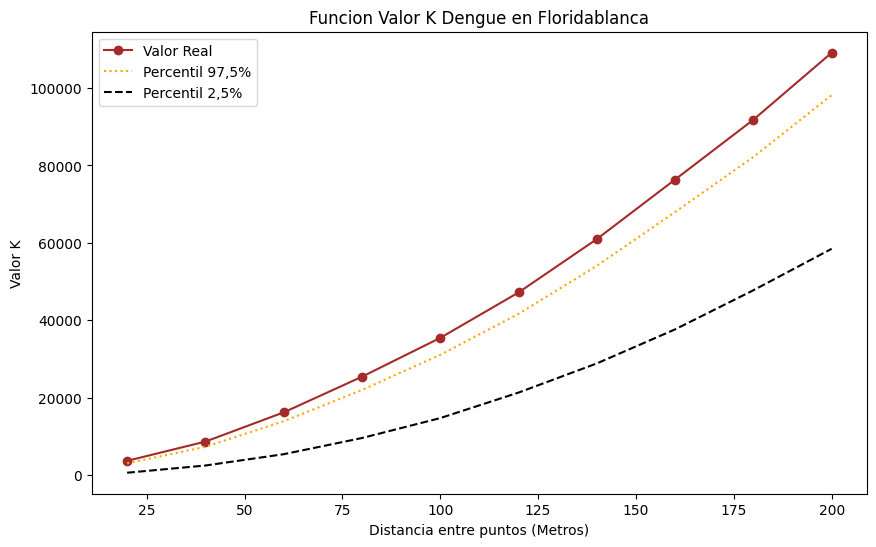

In [119]:
plt.figure(figsize=(10, 6))
plt.plot(df_RES['distancia'], df_RES['K'], label='Valor Real', color='brown', marker='o')
plt.plot(df_RES['distancia'], df_RES['Percentil 97,5'], label='Percentil 97,5%', color='orange', linestyle='dotted')
plt.plot(df_RES['distancia'], df_RES['Percentil 2,5'], label='Percentil 2,5%', color='black', linestyle='dashed')

plt.xlabel('Distancia entre puntos (Metros)')
plt.ylabel('Valor K')
plt.title('Funcion Valor K Dengue en Floridablanca')
plt.legend()
plt.show()